In [8]:
%matplotlib inline
from IPython.display import clear_output
import sys
sys.path.append("..")

import cattrs
import numpy as np
import yaml
import matplotlib.pyplot as plt

from mixture_optimization.datamodels.weight_selector_config import WeightSelectorConfig
from mixture_optimization.weight_selector.weight_selector_interface import TrialMemoryUnit
from mixture_optimization.weight_selector.weight_selector_factory import weight_selector_from_scratch
import logging

from test_optimizer import optimization_loop, load_config

# logger = logging.getLogger("experiment_runner")
# logger.setLevel(logging.INFO)
# logger.addHandler(logging.StreamHandler(stream=sys.stdout))

In [9]:
config = load_config("test_config.yaml")
no_initializations = config.no_initializations
trial_memory = optimization_loop(config)

Identified best value as 4.042810773959311


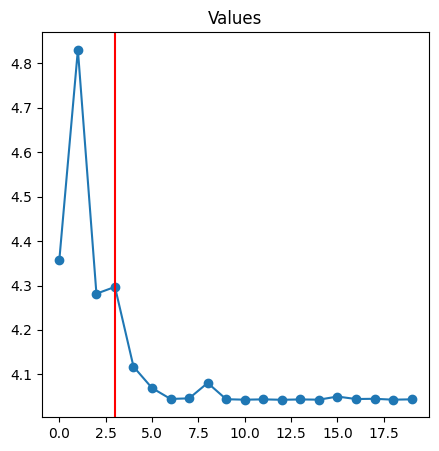

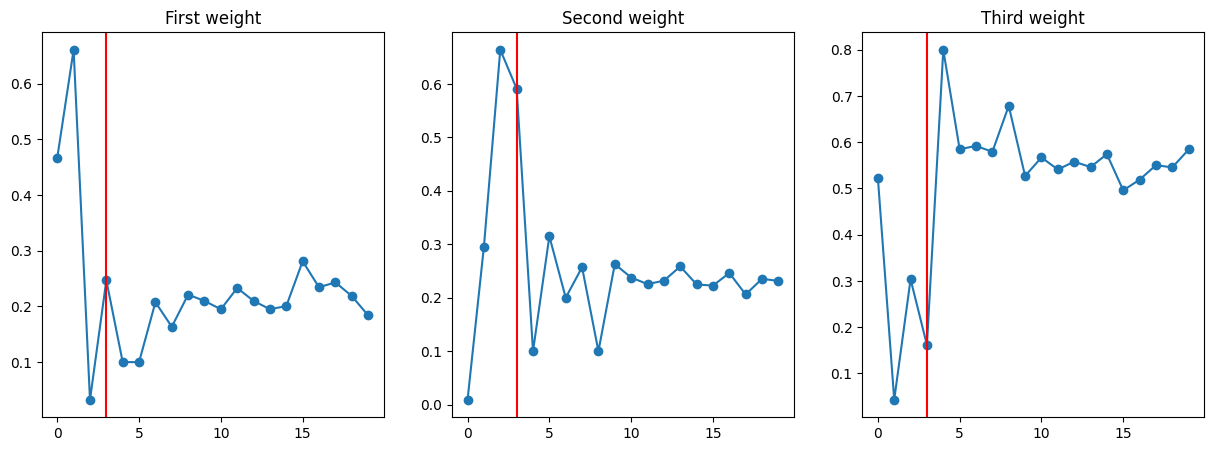

In [10]:
fix, axs = plt.subplots(1,1, figsize=(5,5))

# plot values
values = [-trial.value for trial in trial_memory]
axs.set_title("Values")
axs.plot(values, '-o')
axs.axvline(x=no_initializations -1, color='r')

best_value = min(values)
print(f"Identified best value as {best_value}")

fix, axs = plt.subplots(1,3, figsize=(15,5))
# plot first weight
axs[0].set_title("First weight")
axs[0].plot([trial.weights[0] for trial in trial_memory], '-o')
axs[0].axvline(x=no_initializations -1, color='r')
axs[1].set_title("Second weight")
axs[1].plot([trial.weights[1] for trial in trial_memory], '-o')
axs[1].axvline(x=no_initializations -1, color='r')
axs[2].set_title("Third weight")
axs[2].plot([trial.weights[2] for trial in trial_memory], '-o')
axs[2].axvline(x=no_initializations -1, color='r')